### Student Name: Michael Corrado

In [3]:
#import the required modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

### Step 1 – Load the data and extract the features

In [99]:
features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 
            'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
            'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']

file_path = '' #TODO: provide the file path or URL to the dataset `trip_data.csv`
df = pd.read_csv("/Users/Michael/Python Anaconda/Machine_Learning_SHU/DecisionTree_4/tip_data.csv", usecols=features)

#after the data is loaded in the dataframe, you would normally perform preliminary analysis to verify the data.
# For example, using df.head() and df.describe() but you can skip that step for now. 

#assign the input features to a variable called 'X' and the labels in a variable called 'y'
X = df.iloc[:,0:14].to_numpy() #input features
y = df.iloc[:,14].tolist() #labels

In [100]:
df.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,tip
0,2.0,1.0,24,41,1.0,0.67,5.5,0.5,0.5,0.0,0.3,8.84,1.0,0.00,good
1,2.0,1.0,112,232,1.0,2.64,10.0,0.5,0.5,0.0,0.3,16.86,1.0,2.75,low
2,2.0,1.0,97,227,5.0,3.85,18.0,0.5,0.5,0.0,0.3,22.20,1.0,0.00,low
3,2.0,1.0,223,129,1.0,2.97,11.5,0.5,0.5,0.0,0.3,13.80,1.0,0.00,low
4,2.0,1.0,223,7,1.0,1.60,8.0,0.5,0.5,0.0,0.3,11.62,1.0,0.00,good


In [101]:
df.dtypes

VendorID                 float64
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
trip_type                float64
congestion_surcharge     float64
tip                       object
dtype: object

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,171941.0,1.842190,0.364564,1.00,2.00,2.00,2.00,2.00
RatecodeID,171941.0,1.045731,0.424170,1.00,1.00,1.00,1.00,5.00
PULocationID,171941.0,103.152558,68.253994,1.00,52.00,75.00,145.00,265.00
DOLocationID,171941.0,133.958707,77.035977,1.00,66.00,137.00,203.00,265.00
passenger_count,171941.0,1.306262,0.965556,0.00,1.00,1.00,1.00,9.00
trip_distance,171941.0,2.359276,1.759422,0.01,1.08,1.80,3.10,8.43
fare_amount,171941.0,11.121357,6.393361,0.01,6.50,9.50,14.00,180.00
extra,171941.0,0.448590,0.632314,0.00,0.00,0.50,0.50,4.50
mta_tax,171941.0,0.494548,0.052529,0.00,0.50,0.50,0.50,3.55
tolls_amount,171941.0,0.077659,0.690598,0.00,0.00,0.00,0.00,22.74


**Observations**
- The data above shows that there is no missing data.
- The data above also shows that PULocationID has the greatest standard deviation making me think that it has the most outliers 


### Step 2 – Split the data
Hint: use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from scikit-learn.

### Step 3 - Create the decision tree
Hint: use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) in scikit-learn. Here is an example on how to use build a [decision tree for classification](https://scikit-learn.org/stable/modules/tree.html#classification).

In [103]:
seed = 1#TODO: provide an integer for the random number generator.

#Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .3 , #TODO: provide the test_size (refer to the instructions for the assignment)
                                                    random_state = seed) #seed the random generator for reproducibilt

#Note: X_train and y_train are the input features and labels for the training set respectively.
#Note: X_test and y_test are the input features and labels for the test set respectively.

In [120]:
#Instantiate the Decision Tree Classifier object 
DTC = DecisionTreeClassifier(criterion="gini", max_depth=4)

#TODO: Train Decision Tree Classifier using the `fit` method
DTC = clf.fit(X_train,y_train)

#TODO: Make predictions with `X_test` and store the result in a variable called `y_pred`
y_pred = clf.predict(X_test)

#### Evaluate the prediction accuracy
Hint: use the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) to determine how many observations were classified correctly. Use `y_test` and `y_pred` for the calculations.

In [121]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6178779830564333


**Observations**
- I changed the max depth to a lower number to prevent overfitting, however this sacrificed accuracy of the decision tree

### Step 4 - Visualize the decision tree
Hint: use the export_graphviz method. An [example is shown here](https://scikit-learn.org/stable/modules/tree.html#classification). Alternatively, you may use your preferred library/tool to display the tree.

In [112]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [122]:
#TODO: Display the decision tree
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df.columns[0:14],class_names=DTC.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

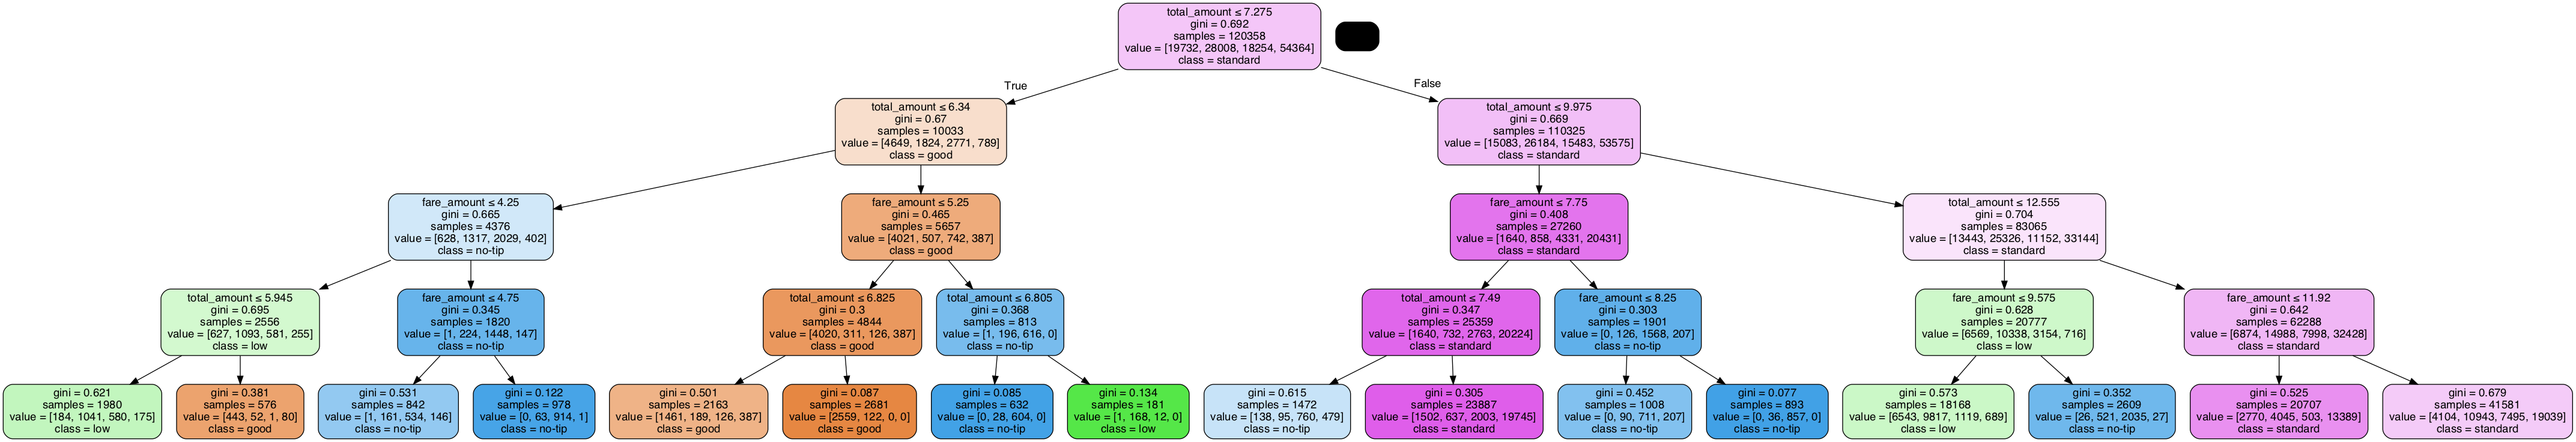

In [123]:
graph.write_png('DecisionTreePt1')
Image(graph.create_png())

### Summarize the results using one paragraph (2-5 sentences)

The graph above shows a decision tree that was built using the tip data csv file. The decision tree tells us that individuals who have a total amount less than or equal to 6.34 will receive a good tip while individuals who have a total amount less than 5.95 will receive a low tip. I am wondering if there is a correlation with prices lower than 5.95 and individuals tipping patterns. I would assume if the bill is too small individuals do not feel the need to tip.

It would be interesting to run other classification models on the dataset and compare accuracy to see the other predictions that are made